In [1]:
import numpy as np
import pandas as pd
import PySAM.Pvsamv1 as pv

# import matplotlib.pyplot as plt

In [2]:
pvmodel = pv.default('PVBatteryResidential')

In [3]:
# there are formatting differences between the weather file that we download from
# pvwatts and what SAM wants --- SAM wants the file from the NSRDB 
pvmodel.SolarResource.solar_resource_file = "../data/tmy_5.579_-0.233_2005_2014.epw"

In [2]:
our_load_profile = np.loadtxt("../data/Max_load_profile_for_year.txt", skiprows=1)

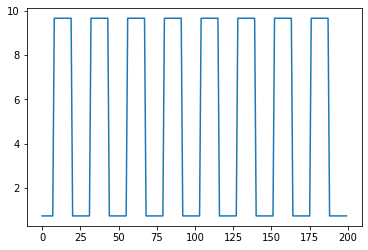

In [5]:
plt.plot(our_load_profile[:200])

In [6]:
pvmodel.Load.load = tuple(our_load_profile)

In [7]:
pvmodel.Module.module_model = 1 # set it to CEC model

In [8]:
pvmodel.CECPerformanceModelWithModuleDatabase.export()

{'cec_a_ref': 2.42033,
 'cec_adjust': 4.86979,
 'cec_alpha_sc': 0.002492,
 'cec_area': 1.631,
 'cec_array_cols': 10.0,
 'cec_array_rows': 1.0,
 'cec_backside_temp': 20.0,
 'cec_beta_oc': -0.16975,
 'cec_bifacial_ground_clearance_height': 1.0,
 'cec_bifacial_transmission_factor': 0.013,
 'cec_bifaciality': 0.65,
 'cec_gamma_r': -0.31,
 'cec_gap_spacing': 0.05,
 'cec_heat_transfer': 0.0,
 'cec_height': 0.0,
 'cec_i_l_ref': 6.23681,
 'cec_i_mp_ref': 5.85,
 'cec_i_o_ref': 3.99e-12,
 'cec_i_sc_ref': 6.23,
 'cec_is_bifacial': 0.0,
 'cec_module_length': 1.631,
 'cec_module_width': 1.0,
 'cec_mounting_config': 0.0,
 'cec_mounting_orientation': 0.0,
 'cec_n_s': 96.0,
 'cec_r_s': 0.499389,
 'cec_r_sh_ref': 457.185,
 'cec_standoff': 6.0,
 'cec_t_noct': 46.4,
 'cec_temp_corr_mode': 0.0,
 'cec_transient_thermal_model_unit_mass': 11.0919,
 'cec_v_mp_ref': 57.3,
 'cec_v_oc_ref': 67.9}

In [9]:
# calculating the total number of modules reqd for the overall system capacity

# module_power = V_mpp * I_mpp
mod_power = 5.85 * 57.3

no_of_modules = 10_000 / mod_power # system capacity needed/ module_power

no_of_modules

29.83249056547486

In [10]:
pvmodel.Inverter.inverter_model = 0. # set it to CEC

pvmodel.Inverter.inv_num_mppt = 1 # use different mmpts

In [11]:
# inverter settings 
pvmodel.Inverter.export()

{'inv_cec_cg_eff_cec': 96.6364,
 'inv_cec_cg_paco': 3800.0,
 'inv_ds_eff': 96.0,
 'inv_ds_paco': 4000.0,
 'inv_num_mppt': 1.0,
 'inv_pd_eff': 95.0,
 'inv_pd_paco': 4000.0,
 'inv_snl_eff_cec': 97.0529,
 'inv_snl_paco': 3850.0,
 'inverter_count': 1.0,
 'inverter_model': 0.0,
 'mppt_hi_inverter': 480.0,
 'mppt_low_inverter': 100.0}

In [12]:
# Calculating the number of modules required per 
# string to satisfy the lower and upper limits of inverter capacity

# high = mmpt_hi_inverter / V_OC_module
module_per_string_high = 480/67.9

# low = mmpt_low_inverter / V_OC_module
module_per_string_low = 100/67.9

module_per_string_low, module_per_string_high

(1.4727540500736376, 7.069219440353461)

In [13]:
# arranging 30 modules in (2 to 7) strings

number_of_modules_per_string = 5
number_of_strings = 6

Refer [this link](https://sam.nrel.gov/images/webinar_files/sam-webinars-2020-modeling-pv-systems.pdf) for detailed explanation on MMPT, subarray, strings, etc

In [14]:
# System Design
pvmodel.SystemDesign.inverter_count = 4

pvmodel.SystemDesign.subarray1_modules_per_string = number_of_modules_per_string
pvmodel.SystemDesign.subarray1_nstrings = number_of_strings
pvmodel.SystemDesign.subarray1_mppt_input = 1
pvmodel.SystemDesign.subarray1_track_mode = 0 # fixed tracking

pvmodel.SystemDesign.subarray2_enable = 1
pvmodel.SystemDesign.subarray2_modules_per_string = number_of_modules_per_string
pvmodel.SystemDesign.subarray2_nstrings = number_of_strings
pvmodel.SystemDesign.subarray2_mppt_input = 1
pvmodel.SystemDesign.subarray2_track_mode = 0 # fixed tracking

pvmodel.SystemDesign.subarray3_enable = 1
pvmodel.SystemDesign.subarray3_modules_per_string = number_of_modules_per_string
pvmodel.SystemDesign.subarray3_nstrings = number_of_strings
pvmodel.SystemDesign.subarray3_mppt_input = 1
pvmodel.SystemDesign.subarray3_track_mode = 0 # fixed tracking

pvmodel.SystemDesign.subarray4_enable = 1
pvmodel.SystemDesign.subarray4_modules_per_string = number_of_modules_per_string
pvmodel.SystemDesign.subarray4_nstrings = number_of_strings
pvmodel.SystemDesign.subarray4_mppt_input = 1
pvmodel.SystemDesign.subarray4_track_mode = 0 # fixed tracking

In [15]:
pvmodel.SystemDesign.export()

{'enable_mismatch_vmax_calc': 0.0,
 'inverter_count': 4.0,
 'subarray1_azimuth': 180.0,
 'subarray1_backtrack': 0.0,
 'subarray1_gcr': 0.3,
 'subarray1_modules_per_string': 5.0,
 'subarray1_monthly_tilt': (40.0,
  40.0,
  40.0,
  20.0,
  20.0,
  20.0,
  20.0,
  20.0,
  20.0,
  40.0,
  40.0,
  40.0),
 'subarray1_mppt_input': 1.0,
 'subarray1_nstrings': 6.0,
 'subarray1_rotlim': 45.0,
 'subarray1_tilt': 20.0,
 'subarray1_tilt_eq_lat': 0.0,
 'subarray1_track_mode': 0.0,
 'subarray2_azimuth': 180.0,
 'subarray2_backtrack': 0.0,
 'subarray2_enable': 1.0,
 'subarray2_gcr': 0.3,
 'subarray2_modules_per_string': 5.0,
 'subarray2_monthly_tilt': (40.0,
  40.0,
  40.0,
  20.0,
  20.0,
  20.0,
  20.0,
  20.0,
  20.0,
  40.0,
  40.0,
  40.0),
 'subarray2_mppt_input': 1.0,
 'subarray2_nstrings': 6.0,
 'subarray2_rotlim': 45.0,
 'subarray2_tilt': 20.0,
 'subarray2_tilt_eq_lat': 0.0,
 'subarray2_track_mode': 0.0,
 'subarray3_azimuth': 180.0,
 'subarray3_backtrack': 0.0,
 'subarray3_enable': 1.0,
 'sub

In [16]:
pvmodel.BatterySystem.batt_computed_bank_capacity = 77 # kWh
pvmodel.BatterySystem.batt_computed_series = 139
pvmodel.BatterySystem.batt_computed_strings = 48
pvmodel.BatterySystem.batt_power_charge_max_kwac = 10.417
pvmodel.BatterySystem.batt_power_discharge_max_kwac = 9.6
pvmodel.BatterySystem.batt_power_charge_max_kwdc = 9.982
pvmodel.BatterySystem.batt_power_discharge_max_kwdc = 9.982

In [17]:
pvmodel.BatterySystem.export()

{'batt_ac_dc_efficiency': 96.0,
 'batt_ac_or_dc': 1.0,
 'batt_computed_bank_capacity': 77.0,
 'batt_computed_series': 139.0,
 'batt_computed_strings': 48.0,
 'batt_current_charge_max': 1998.4,
 'batt_current_choice': 1.0,
 'batt_current_discharge_max': 1998.4,
 'batt_cycle_cost': (0.1,),
 'batt_cycle_cost_choice': 0.0,
 'batt_dc_ac_efficiency': 96.0,
 'batt_dc_dc_efficiency': 99.0,
 'batt_inverter_efficiency_cutoff': 90.0,
 'batt_loss_choice': 0.0,
 'batt_losses': (0.0,),
 'batt_losses_charging': (0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0),
 'batt_losses_discharging': (0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0),
 'batt_losses_idle': (0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0),
 'batt_mass': 39603.9,
 'batt_meter_position': 0.0,
 'batt_power_charge_max_kwac': 10.417,
 'batt_power_charge_max_kwdc': 9.982,
 'batt_power_discharge_max_kwac': 9.6,
 'batt_power_discharge_max_kw

In [18]:
pvmodel.BatteryCell.batt_chem # 0 - lead acid, 1 - Li Ion

1.0

In [19]:
%%time
pvmodel.execute()

CPU times: user 26.1 s, sys: 237 ms, total: 26.4 s
Wall time: 26.4 s


<BarContainer object of 12 artists>

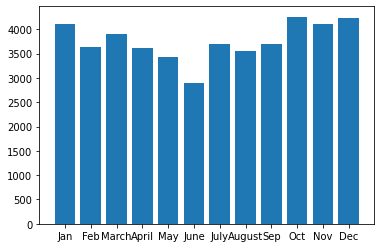

In [20]:
months = ["Jan", "Feb", "March", "April", "May", "June", "July", "August", "Sep", "Oct", "Nov", "Dec"]
plt.bar(months, pvmodel.Outputs.monthly_energy)

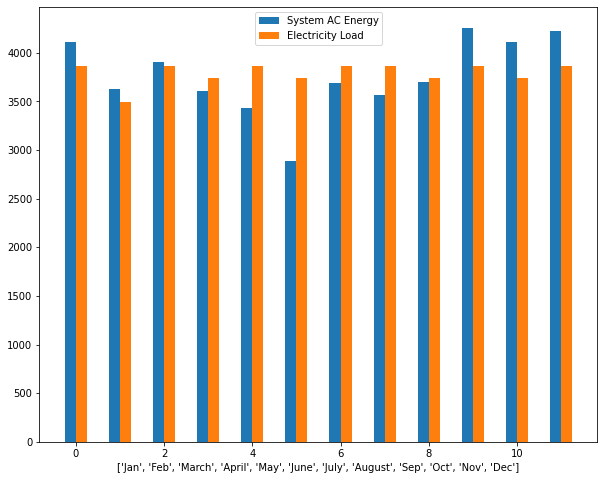

In [21]:
dates = pd.date_range(start="1/1/2006", end="1/1/2007", freq="H").delete(-1)

hourly_load_w_dates = pd.DataFrame({"Load" : pvmodel.Load.load, "Dates" : dates})
monthly_load = hourly_load_w_dates.groupby(hourly_load_w_dates["Dates"].dt.month)["Load"].sum()

months = ["Jan", "Feb", "March", "April", "May", "June", "July", "August", "Sep", "Oct", "Nov", "Dec"]

x = np.arange(len(months))  # the label locations
width = 0.25  # the width of the bars

f, ax = plt.subplots(figsize=(10,8))
ax.bar(x - width/2, pvmodel.Outputs.monthly_energy, width, label="System AC Energy")
ax.bar(x + width/2, monthly_load.values, width, label="Electricity Load")
ax.set_xlabel(months)
plt.legend();

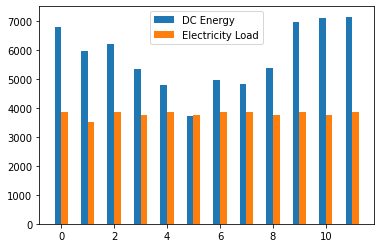

In [22]:
# Monthly DC energy (apparently SAM is plotting this) ---- different from "MOnthly Energy" 
f, ax = plt.subplots()
ax.bar(x - width/2, pvmodel.Outputs.monthly_dc, width, label="DC Energy")
ax.bar(x + width/2, monthly_load.values, width, label="Electricity Load")
plt.legend();

In [23]:
diff_of_energy_load = pvmodel.Outputs.monthly_energy - monthly_load.values

diff_of_energy_load

array([ 245.78207941,  135.21641062,   34.17557842, -137.05715153,
       -436.03722926, -851.94699085, -177.12940005, -305.39329211,
        -44.49028544,  389.32023642,  370.97797595,  357.15846192])

In [26]:
pvmodel.Outputs.monthly_batt_to_load

(745.2333297022948,
 625.5331739811827,
 735.0014563635917,
 732.6101660582731,
 754.6968867844693,
 619.5775036573401,
 707.9506206077256,
 761.9618841645628,
 650.4542082129559,
 753.5976618057869,
 699.5309745886443,
 652.3204983655514)

In [27]:
np.count_nonzero(
    np.array(pvmodel.Outputs.system_to_load) - np.tile(our_load_profile, 25) # repeat load profile for 25 years
)

138776

In [16]:
25*365*24

219000

In [3]:
# Use dask for processing
# import dask
import os

data_path = os.path.abspath("/Users/sarthak/Documents/GitHub_Projects/UW-GRID/PV_sizing/data/")

# pvmodel = pv.default('PVBatteryResidential')

# @dask.delayed
def execute_pvmodel(number_of_modules_per_string, number_of_strings, n_inverters=4, batt_bank_capacity=200):
    
    pvmodel = pv.default('PVBatteryResidential')
#     global pvmodel
    
    pvmodel.SolarResource.solar_resource_file = os.path.join(data_path, "tmy_5.579_-0.233_2005_2014.epw")
    our_load_profile = np.loadtxt(os.path.join(data_path, "Max_load_profile_for_year.txt"), skiprows=1)
    
    pvmodel.Load.load = tuple(our_load_profile)
    
    pvmodel.Module.module_model = 1 # set it to CEC model
    
    pvmodel.Inverter.inverter_model = 0. # set it to CEC
    pvmodel.Inverter.inv_num_mppt = 1 # use single mmpts
    
    # System Design
    pvmodel.SystemDesign.inverter_count = n_inverters

    pvmodel.SystemDesign.subarray1_modules_per_string = number_of_modules_per_string
    pvmodel.SystemDesign.subarray1_nstrings = number_of_strings
    pvmodel.SystemDesign.subarray1_mppt_input = 1
    pvmodel.SystemDesign.subarray1_track_mode = 0 # fixed tracking

    pvmodel.SystemDesign.subarray2_enable = 1
    pvmodel.SystemDesign.subarray2_modules_per_string = number_of_modules_per_string
    pvmodel.SystemDesign.subarray2_nstrings = number_of_strings
    pvmodel.SystemDesign.subarray2_mppt_input = 1
    pvmodel.SystemDesign.subarray2_track_mode = 0 # fixed tracking

    pvmodel.SystemDesign.subarray3_enable = 1
    pvmodel.SystemDesign.subarray3_modules_per_string = number_of_modules_per_string
    pvmodel.SystemDesign.subarray3_nstrings = number_of_strings
    pvmodel.SystemDesign.subarray3_mppt_input = 1
    pvmodel.SystemDesign.subarray3_track_mode = 0 # fixed tracking

    pvmodel.SystemDesign.subarray4_enable = 1
    pvmodel.SystemDesign.subarray4_modules_per_string = number_of_modules_per_string
    pvmodel.SystemDesign.subarray4_nstrings = number_of_strings
    pvmodel.SystemDesign.subarray4_mppt_input = 1
    pvmodel.SystemDesign.subarray4_track_mode = 0 # fixed tracking
    
    mod_power_rating = pvmodel.CECPerformanceModelWithModuleDatabase.cec_v_mp_ref * pvmodel.CECPerformanceModelWithModuleDatabase.cec_i_mp_ref
    pvmodel.SystemDesign.system_capacity = mod_power_rating * 4 * number_of_modules_per_string * number_of_strings
    
    
    pvmodel.BatterySystem.batt_current_charge_max = 24
    pvmodel.BatterySystem.batt_current_discharge_max = 24

    pvmodel.BatterySystem.batt_power_charge_max_kwac = 12
    pvmodel.BatterySystem.batt_power_discharge_max_kwac= 11

    pvmodel.BatterySystem.batt_power_charge_max_kwdc = 12
    pvmodel.BatterySystem.batt_power_discharge_max_kwdc= 12

    pvmodel.BatterySystem.en_batt = 1
    
#     pvmodel.BatterySystem.batt_computed_bank_capacity = batt_bank_capacity # kWh
#     pvmodel.BatterySystem.batt_computed_series = 139
#     pvmodel.BatterySystem.batt_computed_strings = 48
#     pvmodel.BatterySystem.batt_power_charge_max_kwac = 10.417
#     pvmodel.BatterySystem.batt_power_discharge_max_kwac = 9.6
#     pvmodel.BatterySystem.batt_power_charge_max_kwdc = 9.982
#     pvmodel.BatterySystem.batt_power_discharge_max_kwdc = 9.982
    
    pvmodel.BatteryDispatch.batt_dispatch_choice = 4.0 # manual discharge
    pvmodel.BatteryDispatch.dispatch_manual_charge = (1, 1, 1, 1, 0, 0)
    pvmodel.BatteryDispatch.dispatch_manual_discharge = (1, 1, 1, 1, 0, 0)
    pvmodel.BatteryDispatch.dispatch_manual_percent_discharge = (25, 25, 25, 75)
    
    pvmodel.execute()
    
    return pvmodel

In [4]:
%%time
pvmodel = execute_pvmodel(5, 6, n_inverters=10)

CPU times: user 27.7 s, sys: 303 ms, total: 28 s
Wall time: 28.2 s


In [5]:
pvmodel.BatterySystem.batt_computed_bank_capacity

4000.0

In [6]:
pvmodel.BatteryCell.batt_Cp

1500.0

<BarContainer object of 12 artists>

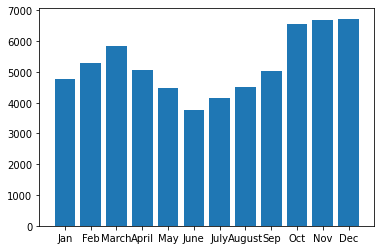

In [92]:
import matplotlib.pyplot as plt

months = ["Jan", "Feb", "March", "April", "May", "June", "July", "August", "Sep", "Oct", "Nov", "Dec"]
plt.bar(months, pvmodel.Outputs.monthly_energy)

In [93]:
uptime_hours = np.count_nonzero(
        (np.array(pvmodel.Outputs.system_to_load) + 
         np.array(pvmodel.Outputs.batt_to_load) - 
         np.tile(our_load_profile, 25)  # repeat load profile for 25 years
        ) == 0 
    )
    
uptime_hours/(365 * 24 * 25) , uptime_hours

(1.0, 219000)

## Running multiple scenarios

In [97]:
pvmodels_param_dict = []
pvmodels = []

In [98]:
%%time

# l = []  # for testing purposes

for m in range(2,8):
    for n in range(4,15):
        if m*n >=30:
#             l.append([m,n])
            pvmodels_param_dict.append({"modules_per_string" : m, "number_of_strings" : n})
            z = execute_pvmodel(m,n, n_inverters=5)
            pvmodels.append(z)

CPU times: user 18min 31s, sys: 7.56 s, total: 18min 39s
Wall time: 18min 41s


In [99]:
len(pvmodels)

41

In [70]:
pvmodels[0]

In [100]:
uptime_percent = []

for i in range(len(pvmodels)):
    uptime_hours = np.count_nonzero(
        (np.array(pvmodels[i].Outputs.system_to_load) + 
         np.array(pvmodels[i].Outputs.batt_to_load) - 
         np.tile(our_load_profile, 25)  # repeat load profile for 25 years
        ) == 0 
    )
    
    uptime_percent.append(uptime_hours/(365 * 24 * 25))

In [101]:
uptime_percent

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [102]:
pvmodels_param_dict

[{'modules_per_string': 3, 'number_of_strings': 10},
 {'modules_per_string': 3, 'number_of_strings': 11},
 {'modules_per_string': 3, 'number_of_strings': 12},
 {'modules_per_string': 3, 'number_of_strings': 13},
 {'modules_per_string': 3, 'number_of_strings': 14},
 {'modules_per_string': 4, 'number_of_strings': 8},
 {'modules_per_string': 4, 'number_of_strings': 9},
 {'modules_per_string': 4, 'number_of_strings': 10},
 {'modules_per_string': 4, 'number_of_strings': 11},
 {'modules_per_string': 4, 'number_of_strings': 12},
 {'modules_per_string': 4, 'number_of_strings': 13},
 {'modules_per_string': 4, 'number_of_strings': 14},
 {'modules_per_string': 5, 'number_of_strings': 6},
 {'modules_per_string': 5, 'number_of_strings': 7},
 {'modules_per_string': 5, 'number_of_strings': 8},
 {'modules_per_string': 5, 'number_of_strings': 9},
 {'modules_per_string': 5, 'number_of_strings': 10},
 {'modules_per_string': 5, 'number_of_strings': 11},
 {'modules_per_string': 5, 'number_of_strings': 12},

<BarContainer object of 12 artists>

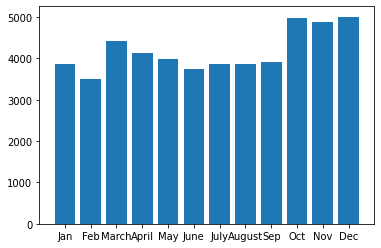

In [103]:
months = ["Jan", "Feb", "March", "April", "May", "June", "July", "August", "Sep", "Oct", "Nov", "Dec"]
plt.bar(months, pvmodels[0].Outputs.monthly_energy)

In [105]:
(np.array(pvmodels[0].Outputs.system_to_load) + np.array(pvmodels[0].Outputs.batt_to_load) - np.tile(our_load_profile, 25))[-24:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])